<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L8_5Edge_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

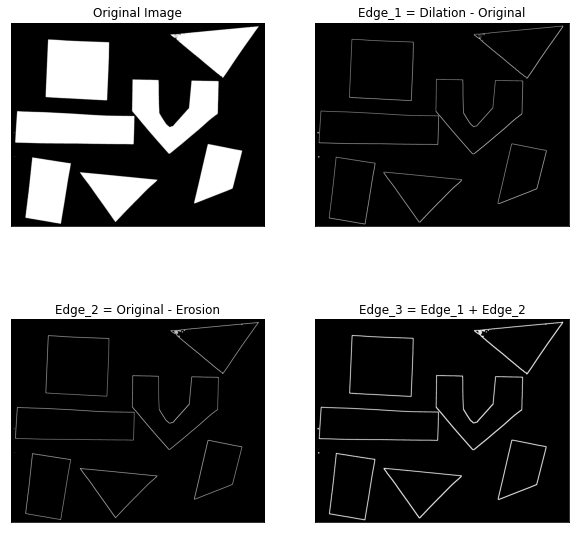

True

In [1]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image from URL
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/objects.png'
resp = urllib.request.urlopen(url)
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.astype('float32') / 255.0

# detect edges
se = cv2.getStructuringElement(cv2.MORPH_RECT, (10,10))
img_dilation = cv2.dilate(img, se)
img_erosion = cv2.erode(img, se)
edge1 = img_dilation - img
edge2 = img - img_erosion
edge3 = edge1 + edge2

# show images
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 2), plt.imshow(edge1)
plt.title('Edge_1 = Dilation - Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 3), plt.imshow(edge2)
plt.title('Edge_2 = Original - Erosion'), plt.xticks([]), plt.yticks([])
plt.subplot(2, 2, 4), plt.imshow(edge3)
plt.title('Edge_3 = Edge_1 + Edge_2'), plt.xticks([]), plt.yticks([])
plt.show()

# save images
cv2.imwrite('Edge_Detection_by_Dilation.png', edge1*255.0)
cv2.imwrite('Edge_Detection_by_Erosion.png', edge2*255.0)
cv2.imwrite('Edge_Detection_by_Combined_Edges.png', edge3*255.0)
